# Лабораторная обучение без учителя

Лабораторная состоит из гайда по работе с задачами машинного обучения без учителя (unsupervised learning) на Python и трёх обязательных заданий:
* [Задание 1](#Задание-1.) - понижение размерности с помощью t-SNE;
* [Задание 2](#Задание-2.) - кластеризация с фильтрацией выбросов с помощью DBSCAN;
* [Задание 3](#Задание-3.) - кластеризация вершин графа генов _Mus musculus_ с помощью MCL. За попадание в топ 3 по качеству кластеризации можно получить 1 дополнительный балл.

Сначала рекомендуется ознакомиться с гайдом, после чего выполнять задания.

---

## Необходимые модули

Подключим необходимые библиотеки

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans, DBSCAN

## 1. Понижение размерности

Одна из задач обучения без учителя (unsupervised learning) - понижение размерности.

Напомним, что идея задачи понижения размерности состоит в переходе к небольшому числу показательных (информативных) признаков, принимающих много значений - с такими признаками работать проще.

Воспользуемся методом t-SNE для понижения размерности для данных "wine" (набор данных доступен в библиотеке scikit-learn)

In [2]:
# Прочитаем данные
x_all, y_all = load_iris(return_X_y=True)
# Поделим на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=123)

print(f'Размеры выборок: тренировочная - {x_train.shape[0]}, тестовая - {x_test.shape[0]}')
print(f'Кол-во признаков: {x_train.shape[1]}')

Размеры выборок: тренировочная - 120, тестовая - 30
Кол-во признаков: 4


Обучим классификатор, основанный на _машине опорных векторов_ (support vector machine, SVM).

Метод SVM ищет параметры гиперплоскости (или гиперповерхности), которая разделяет пространство признаков данных на области, каждая область соответствует своему классу.

In [3]:
sv_clf = SVC(kernel='linear', random_state=123)
sv_clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=123)

Оценим качество полученной модели

In [4]:
predictions = sv_clf.predict(x_test)
print('Accuracy score = {:.3f}'.format(accuracy_score(y_test, predictions)))
print('F1 score = {:.3f}'.format(f1_score(y_test, predictions, average='macro')))

Accuracy score = 0.967
F1 score = 0.955


Воспользуемся t-SNE в качестве предобработки данных

_Примечание:_ особенность метода t-SNE и его реализации в scikit-learn в том, что этот метод нельзя применять к новым данным, которые могут появиться на стадии предсказания обученной модели. Появление новых данных может серьёзно изменить отображение, построенное с помощью t-SNE, что является серьёзным ограничением применимости этого метода. В связи с этим, отображение t-SNE следует строить сразу и для тренировочных, и для тестовых данных

In [5]:
tsne = TSNE(n_components=2, init='random', random_state=123)
# Так как строим отображение сразу и для тренировочных, и для тестовых данных, надо запомнить, какие из данных тренировочные
train_len = x_train.shape[0]
x_all_transformed = tsne.fit_transform(np.vstack([x_train, x_test]))
x_train_transformed = x_all_transformed[:train_len, :]  # Вытаскиваем признаки для тренировочных данных
x_test_transformed = x_all_transformed[train_len:, :]  # Остальные данные - тестовые
print(f'Кол-во признаков после предобработки: {x_train_transformed.shape[1]}')

Кол-во признаков после предобработки: 2


Визуализация данных после предобработки

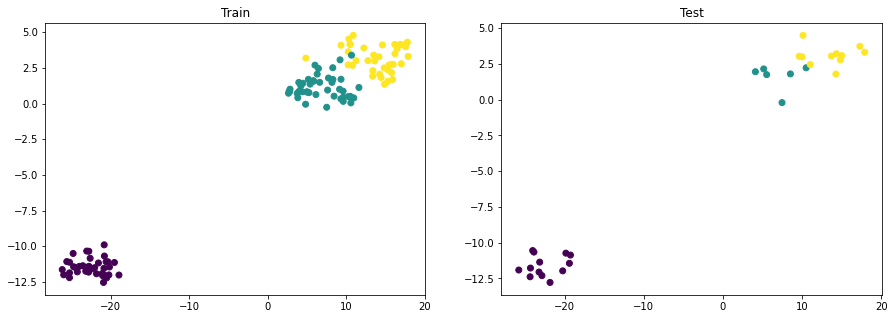

In [6]:
def show_tsne_result(x_train_new, x_test_new, y_train, y_test):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    ax[0].scatter(x_train_new[:,0], x_train_new[:,1], c=y_train)
    ax[0].set_title('Train')
    
    ax[1].scatter(x_test_new[:,0], x_test_new[:,1], c=y_test)
    ax[1].set_title('Test')
    
    plt.show()

show_tsne_result(x_train_transformed, x_test_transformed, y_train, y_test)

Обучим SVM-классификатор с линейным ядром и посмотрим, как улучшилось качество

In [7]:
sv_clf = SVC(kernel='linear', random_state=123)
sv_clf.fit(x_train_transformed, y_train)
predictions = sv_clf.predict(x_test_transformed)
print('Accuracy score = {:.3f}'.format(accuracy_score(y_test, predictions)))
print('F1 score = {:.3f}'.format(f1_score(y_test, predictions, average='macro')))

Accuracy score = 1.000
F1 score = 1.000


---

### Задание 1.

Подберите параметры `TSNE` так, чтобы SVM-классификатор с линейным ядром, обученный на предобработанных данных, давал качество по **каждой** из метрик `accuracy` и `f1` **не ниже** `0.98`. При этом параметр `n_components` оставьте равным `2`.

Менять можно **только** параметры `t-SNE`, менять гиперпараметры SVM-классификатора **запрещается**.

_Подсказки_:
1. Наиболее важный параметр в методе t-SNE - `perplexity`.
2. SVM с линейным ядром идеально работает, когда данные линейно разделимы - то есть, когда для каждого класса есть прямая (в нашем случае), отделяющая этот класс от остальных

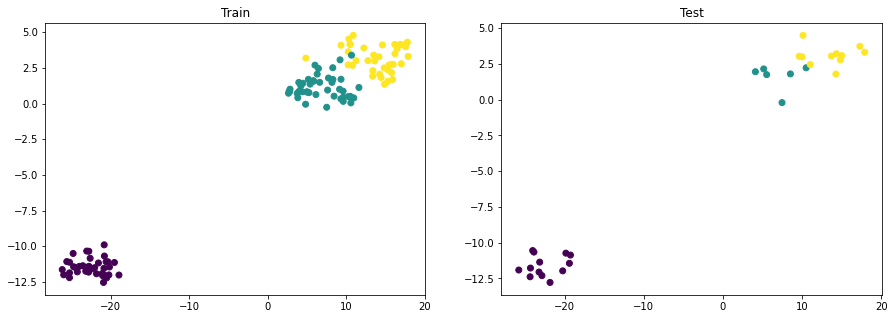

Accuracy score = 1.000
F1 score = 1.000
Требуемое качество достигнуто


In [12]:
# Поменяйте параметры в TSNE
tsne = TSNE(
    n_components=2,  # но кол-во размерностей оставьте равным 2
    init='random',
    random_state=123,
    perplexity=30.0,
)

# Код для предобработки менять можно, но не обязательно
train_len = x_train.shape[0]
x_all_transformed = tsne.fit_transform(np.vstack([x_train, x_test]))
x_train_transformed = x_all_transformed[:train_len, :]
x_test_transformed = x_all_transformed[train_len:, :]

show_tsne_result(x_train_transformed, x_test_transformed, y_train, y_test)

# Код ниже менять запрещается
sv_clf = SVC(kernel='linear', random_state=123)
sv_clf.fit(x_train_transformed, y_train)
predictions = sv_clf.predict(x_test_transformed)
final_accuracy, final_f1 = accuracy_score(y_test, predictions), f1_score(y_test, predictions, average='macro')
print('Accuracy score = {:.3f}'.format(final_accuracy))
print('F1 score = {:.3f}'.format(final_f1))
if final_accuracy >= 0.98 and final_f1 >= 0.98:
    print('Требуемое качество достигнуто')
else:
    print('Требуемое качество не достигнуто')

---

## 2. Кластеризация

### K-Means

На практике случается, что надо объединить данные в группы, при этом известно количество групп. Такую задачу можно решить с помощью метода кластеризации _K-Means_ (или K-средних).

Метод пытается найти такие "центры" кластеров, чтобы минимизировать СКО внутри кластеров.

Особенности метода:
* Требуется задать кол-во кластеров
* Требуется задать начальное положение всех центров

#### Пример

Сгенерируем данные, посмотрим на них

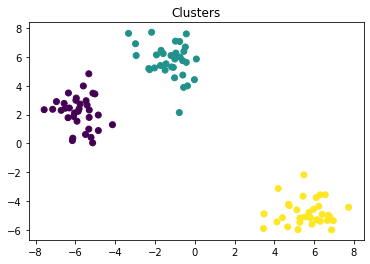

In [13]:
x_blobs, y_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1234)  # Лучше не менять random_state

plt.scatter(x_blobs[:,0], x_blobs[:,1], c=y_blobs)
plt.title('Clusters')
plt.show()

По картинке видно, что данные образуют 3 группы.

Воспользуемся методом K-means, чтобы разделить данные на группы, не пользуясь информацией о метках

_Замечание_: обычно начальное положение центров кластеров задаются случайным образом, как и в случае метода `KMeans` из библиотеки scikit-learn, который использован далее

In [14]:
kmeans_clustering = KMeans(n_clusters=3, random_state=123)
kmeans_clustering.fit(x_blobs)

KMeans(n_clusters=3, random_state=123)

Посмотрим, как выполнена кластеризация

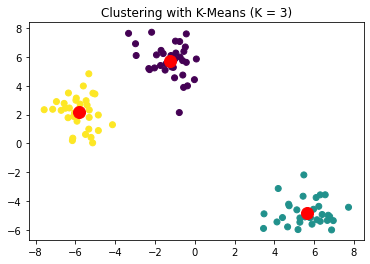

In [15]:
plt.scatter(x_blobs[:,0], x_blobs[:,1], c=kmeans_clustering.labels_)
plt.title('Clustering with K-Means (K = 3)')

cluster_centers = kmeans_clustering.cluster_centers_

# Красными точками отметим центры кластеров
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro', markersize=12)
plt.show()

Посмотрим, что будет, если с помощью параметра `n_clusters` задать не 3, а 4 кластера

In [16]:
kmeans_clustering = KMeans(n_clusters=4, random_state=123)
kmeans_clustering.fit(x_blobs)

KMeans(n_clusters=4, random_state=123)

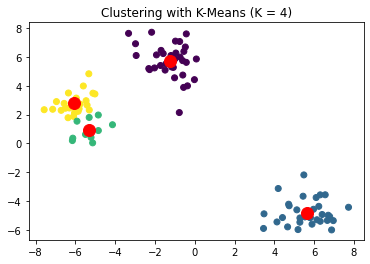

In [17]:
plt.scatter(x_blobs[:,0], x_blobs[:,1], c=kmeans_clustering.labels_)
plt.title('Clustering with K-Means (K = 4)')

cluster_centers = kmeans_clustering.cluster_centers_

# Красными точками отметим центры кластеров
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'ro', markersize=12)
plt.show()

Модель `K-means` имеет свои особенности, из-за которых она применима в задачах, где известно кол-во кластеров, и эти кластеры можно описывать шарами (это заложено в принцип обучения модели).

Если "контекст", в котором ставится задача кластеризации, подразумевает, что кластерам могут соответствовать области более сложной формы, или неизвестно кол-во кластеров, следует пользоваться другими методами.

### DBSCAN

Рассмотрим подробнее метод кластеризации _DBSCAN_.

Особенности этого метода:
* Кластерами считаются такие облака из точек, где точки находятся _достаточно близко_ друг к другу - можно находить плотные кластеры более сложной формы, чем простые шары
* Точки, у которых "нет соседей", можно считать выбросами

#### Пример

Сгенерируем данные в виде прямоугольной области и "кольца" около этой области

In [18]:
np.random.seed(123)

cluster_1 = np.random.uniform(-2, 2, (300, 2))

cluster_2_phi = np.random.uniform(-np.pi, np.pi, 350)
cluster_2_r = np.random.uniform(4, 5, 350)
cluster_2_x, cluster_2_y = cluster_2_r * np.cos(cluster_2_phi), cluster_2_r * np.sin(cluster_2_phi)
cluster_2 = np.vstack([cluster_2_x, cluster_2_y]).transpose(1, 0)

clusters = np.vstack([cluster_1, cluster_2])

Посмотрим на данные

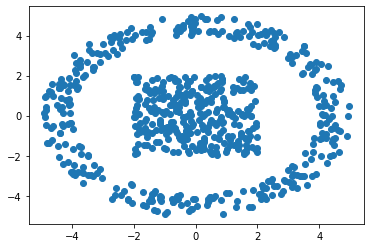

In [19]:
plt.scatter(clusters[:,0], clusters[:,1])
plt.show()

Построим кластеризацию с помощью `KMeans` и `DBSCAN`.

Ожидаем, что KMeans не сможет отличить кольцо от прямоугольника, а DBSCAN сможет

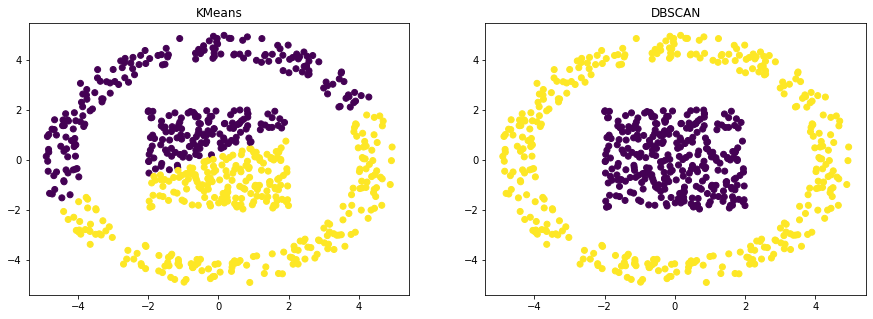

In [20]:
kmeans = KMeans(n_clusters=2, random_state=123).fit(clusters)
dbscan = DBSCAN(eps=1, min_samples=10).fit(clusters)

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

for i, (method, name) in enumerate(zip((kmeans, dbscan), ("KMeans", "DBSCAN"))):
    ax[i].scatter(clusters[:,0], clusters[:,1], c=method.labels_)
    ax[i].set_title(name)

plt.show()

Добавим случайный шум (распределённый равномерно, но не плотно), чтобы имитировать выбросы.

Чуть повысим плотность объектов в "кольце", повысив их кол-во

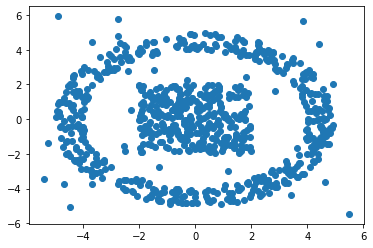

In [21]:
np.random.seed(123)

cluster_1 = np.random.uniform(-2, 2, (300, 2))

cluster_2_phi = np.random.uniform(-np.pi, np.pi, 450)
cluster_2_r = np.random.uniform(4, 5, 450)
cluster_2_x, cluster_2_y = cluster_2_r * np.cos(cluster_2_phi), cluster_2_r * np.sin(cluster_2_phi)
cluster_2 = np.vstack([cluster_2_x, cluster_2_y]).transpose(1, 0)

outliers = np.random.uniform(-6, 6, (40, 2))

clusters = np.vstack([cluster_1, cluster_2, outliers])

plt.scatter(clusters[:,0], clusters[:,1])
plt.show()

---
### Задание 2.

Произведите кластеризацию таким образом, чтобы "выбросы" были зафиксированы, но при этом кластеры "не распадались" на более мелкие компоненты. Следует подбирать **следующие параметры**: `eps`, `min_samples`.

Ответ состоит из одной картинки с двумя "подграфиками":
* на подграфике "All" должны быть показаны результаты кластеризации (должно получиться 2 кластера и выбросы)
* на подграфике "No outliers" должны быть показаны те же результаты кластеризации, но выбросы должны быть отфильтрованы

Сохраните полученную картинку в файл `task_2.png`.

**Важно**: кластеры остаются теми же - квадрат в области $[-2,2]^2$ и кольцо около этого квадрата. Менять данные запрещается!

_Подсказка_: чтобы кластер не распадался на множество кластеров, можно уменьшать `eps`; чтобы несколько стоящих рядом выбросов не объединялись в целый кластер, можно увеличивать `min_samples`.

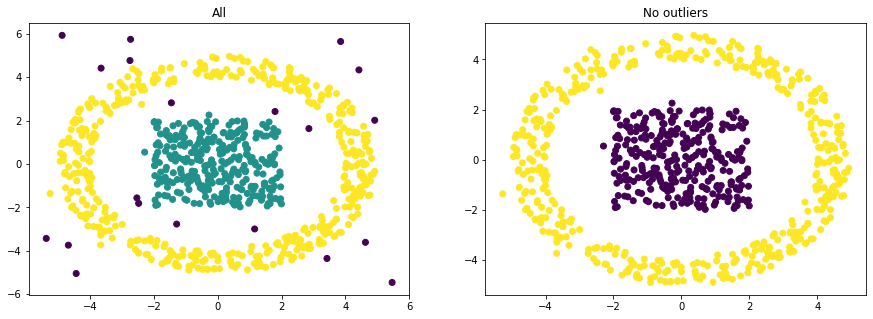

In [79]:
# Следует поменять параметры только у конструктора класса DBSCAN
dbscan = DBSCAN(eps=0.636, min_samples=10).fit(clusters)

# Код ниже нужен только для отрисовки, его менять не надо
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

ax[0].scatter(clusters[:,0], clusters[:,1], c=dbscan.labels_)
ax[0].set_title('All')

clusters_no_outliers = clusters[dbscan.labels_ != -1,:]
ax[1].scatter(clusters_no_outliers[:,0], clusters_no_outliers[:,1], c=dbscan.labels_[dbscan.labels_ != -1])
ax[1].set_title('No outliers')

plt.savefig('task_2.png')
plt.show()

---

### MCL-clustering

Еще один интересный алгоритм кластеризации - _MCL algorithm - Markov Cluster Algorithm_ на основе графов.

Метод опирается на следующие утверджения:
* Расстояние между узлами графа, относящимися к одному кластеру, меньше, чем расстояниме между узлами, относящимися к различным кластерам
* При случайном обходе графа, прежде чем покинуть кластер, будут посещены многие из его вершин
* Края между кластерами вероятнее всего находятся на кратчайших путях

Особенности метода:

* Может работать с взвешенными и невзвешенными графами
* Может находить кластеры произвольной формы
* Не умеет находить перекрывающиеся кластеры
* Кластеры могут быть разного размера

Подробнее можно прочитать тут: https://micans.org/mcl/

Для того, чтобы воспользоваться алгоритмом, дополнительно установим библиотеку `markov-clustering`:

In [80]:
!pip install markov-clustering
!pip install decorator==5.0.9

  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.0
    Uninstalling decorator-5.1.0:
      Successfully uninstalled decorator-5.1.0


#### Пример

Посмотрим, как алгоритм будет работать на модельных данных. Сгенерируем случайный граф с помощью библиотеки `networkx`:

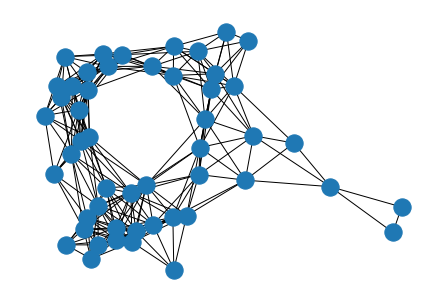

In [81]:
import networkx as nx
import random

# задаем нужное количество вершин
nodesnum = 50

# генерируем граф
graph = nx.random_geometric_graph(nodesnum, radius = 0.3)

# получаем матрицу смежности из сгенерированного графа
matrix = nx.to_scipy_sparse_matrix(graph)

# получаем расположение узлов сгенерированного графа
positions = nx.spring_layout(graph)

#нарисуем получившийся граф
nx.draw(graph, pos = positions)

Применим марковский алгоритм кластеризации:

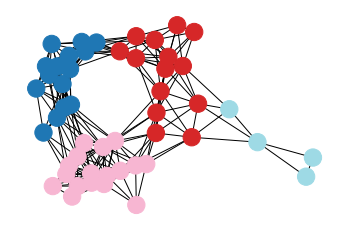

Wall time: 966 ms


In [82]:
%%time
import markov_clustering as mc

# получаем результат кластеризации
result = mc.run_mcl(matrix)

# выделяем получившиеся кластеры
clusters = mc.get_clusters(result)

# отрисовываем граф с результатами кластеризации
mc.draw_graph(matrix, clusters, pos = positions, with_labels = False)

Одной из наиболее популярных метрик оценки качества кластеризации на графах является __модулярность__.

Модулярность представляет собой меру "неслучайности" полученных кластеров.

Пусть $k_i$ - степень вершины $i$,  
$m$ - число ребер в графе,  
$A$ - матрица смежности, содержащая веса ребер,  
$c_i$ - кластер, к которому относится вершина $i$,  
$\delta(i,j) = 1$ при $c_i=c_j$, иначе $0$.  
Допустим, мы перемещаем ребра, сохраняя распределение степеней. Тогда грубая оценка вероятности того, что $i$ и $j$ будут соединены, равняется: $\cfrac{k_ik_j}{2m}$.

Тогда __модулярность__ - мера "неслучайнсости" - рассчитывается следующим образом:
$$Q = \cfrac{1}{2m}\sum_{i, j}\left[A_{i, j} - \cfrac{k_ik_j}{2m}\right]\delta(c_i, c_j)$$

Чем выше значение величины модулярности, тем лучше качество кластеризации. Модулярность лежит в интервале от $-1$ до $1$.

Посчитаем модулярность нашего варианта кластеризации:

In [83]:
Q = mc.modularity(matrix = result, clusters = clusters)
print('Modularity score = {:.3f}'.format(Q))

Modularity score = 0.650


Рассмотрим [данные](https://www.omicsdi.org/dataset/geo/GSE10246) об эксперссии генов мышей. Был построен граф генов _Mus musculus_, где вершинами являются сами гены, а взвешенные ребра показывают отношение их коэкспрессии друг к другу.   
Загрузим получившийся граф и посмотрим на него:

Wall time: 2.45 s


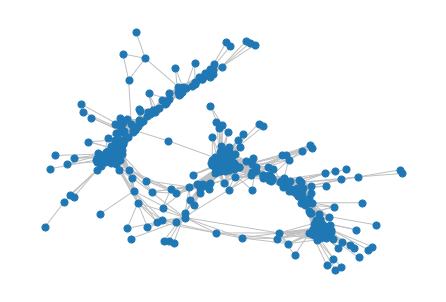

In [84]:
%%time
import pandas as pd

# считываем датасет
G = pd.read_csv("task3.csv", sep=";", header=None)

# создаем граф
graph = nx.Graph()

for i in range(len(G)):
    graph.add_edge(G[0][i], G[1][i], weight = G[2][i])

# получаем матрицу смежности для данного графа
matr = nx.to_scipy_sparse_matrix(graph)

# получаем расположение узлов графа генов
p = nx.spring_layout(graph, seed=123)
 
# отрисовываем граф
nx.draw(graph, pos=p, node_size=50, edge_color="silver")

---

### Задание 3.

Проведите кластеризацию с помощью марковского алгоритма так, чтобы модулярность оказалась выше `0.796`.

Для этого изменяйте параметры алгоритма - функции `run_mcl`.

_Наиболее важные параметры:_
* `expansion > 1`, целое - "расширение" матрицы - то есть степень, в которую будет возводиться матрица смежности
* `inflation > 1`, вещественное - "инфляция" матрицы - то есть степень, в которую будет возведен каждый элемент матрицы

Другие параметры:
* `loop_value >=0` - значение, присваемое в матрице смежности для переходов из вершины в саму себя
* `iterations > 0` - количество итераций алгоритма. Если будет достигнута сходимость, итераций может быть меньше указанных
* `pruning_treshold >= 0` - если значение в матрице становится меньше данного, оно заменяется на 0

_За попадание в топ 3 по качеству в этой задаче можно получить 1 дополнительный балл_

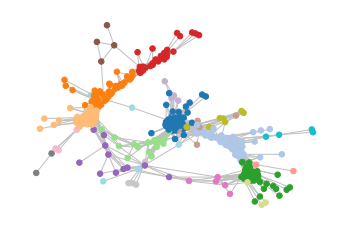

In [141]:
res = mc.run_mcl(matr,
                 # Эти параметры можно менять
                 expansion=2,
                 inflation=2,
                 loop_value=0.5,
                 iterations=100,
                 pruning_threshold=0.001,
                )

# эту часть кода менять не нужно - здесь происходит отрисовка

# выделяем получившиеся кластеры
clusters = mc.get_clusters(res)

# отрисовываем граф с результатами кластеризации
mc.draw_graph(graph, clusters, pos=p, with_labels = False, node_size=30, edge_color="silver")

In [142]:
Q = mc.modularity(matrix = res, clusters = clusters)
print('Modularity score = {:.5f}'.format(Q))
print('Требуемое качество достигнуто' if Q > 0.798 else 'Требуемое качество не достигнуто')

Modularity score = 0.80131
Требуемое качество достигнуто
